<a href="https://colab.research.google.com/github/A00815749/implang_itesm/blob/main/GraficasImplang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline 
import plotly.graph_objects as go
from matplotlib import cm
from math import log10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Areas Verdes
av = pd.read_csv('/content/drive/MyDrive/BDImplang/areas_verdes.csv')
#Denue
dn = pd.read_csv('/content/drive/MyDrive/BDImplang/DENUE_2020.csv')
dnk1 = pd.read_csv('/content/drive/MyDrive/BDImplang/DENUEK1.csv')

#Inegi 
ine = pd.read_csv('/content/drive/MyDrive/BDImplang/INEGI_2020.csv')
inek1 = pd.read_csv('/content/drive/MyDrive/BDImplang/INEGIK1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Grafico de Radiales: Porcentajes en K1


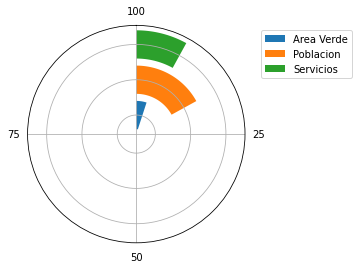

In [ ]:
avk1 = av[av['SECTOR'] == 'K1']
avPer = len(avk1.index)/len(av.index)
avPer = float("{:.2f}".format(avPer))

pobPer = len(inek1.index)/len(ine.index)
pobPer = float("{:.2f}".format(pobPer))

serPer = len(dnk1.index)/len(dn.index)
serPer = float("{:.2f}".format(serPer))

labs = ['Area Verde', 'Poblacion', 'Servicios']

ax = plt.subplot(projection='polar')
ax.barh(0, math.radians(360*avPer))
ax.barh(1, math.radians(360*pobPer))
ax.barh(2, math.radians(360*serPer))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids([0, 90, 180, 270], labels=[100, 25, 50, 75])
ax.set_rgrids([0, 1, 2], labels=['','',''])
ax.legend(labels=labs, bbox_to_anchor=(1.05, 1), loc='upper left')

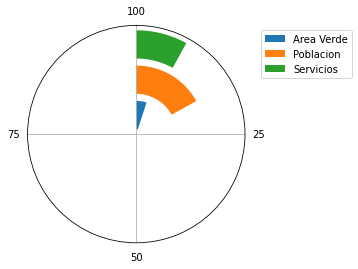

In [ ]:
avk1 = av[av['SECTOR'] == 'K1']
avPer = len(avk1.index)/len(av.index)
avPer = float("{:.2f}".format(avPer))

pobPer = len(inek1.index)/len(ine.index)
pobPer = float("{:.2f}".format(pobPer))

serPer = len(dnk1.index)/len(dn.index)
serPer = float("{:.2f}".format(serPer))

labs = ['Area Verde', 'Poblacion', 'Servicios']

ax = plt.subplot(projection='polar')
ax.barh(0, math.radians(360*avPer))
ax.barh(1, math.radians(360*pobPer))
ax.barh(2, math.radians(360*serPer))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids([0, 90, 180, 270], labels=[100, 25, 50, 75])
ax.set_rgrids([])
ax.legend(labels=labs, bbox_to_anchor=(1.05, 1), loc='upper left')

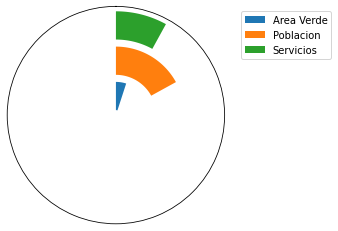

In [ ]:
avk1 = av[av['SECTOR'] == 'K1']
avPer = len(avk1.index)/len(av.index)
avPer = float("{:.2f}".format(avPer))

pobPer = len(inek1.index)/len(ine.index)
pobPer = float("{:.2f}".format(pobPer))

serPer = len(dnk1.index)/len(dn.index)
serPer = float("{:.2f}".format(serPer))

labs = ['Area Verde', 'Poblacion', 'Servicios']

ax = plt.subplot(projection='polar')
ax.barh(0, math.radians(360*avPer))
ax.barh(1, math.radians(360*pobPer))
ax.barh(2, math.radians(360*serPer))
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids([])
ax.set_rgrids([])
ax.legend(labels=labs, bbox_to_anchor=(1.05, 1), loc='upper left')

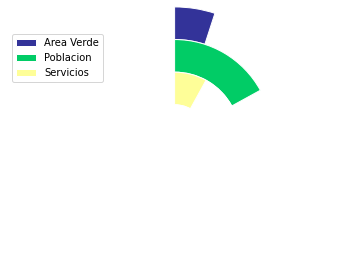

In [ ]:
avk1 = av[av['SECTOR'] == 'K1']
avPer = len(avk1.index)/len(av.index)
avPer = float("{:.2f}".format(avPer))

pobPer = len(inek1.index)/len(ine.index)
pobPer = float("{:.2f}".format(pobPer))

serPer = len(dnk1.index)/len(dn.index)
serPer = float("{:.2f}".format(serPer))

labs = ['Area Verde', 'Poblacion', 'Servicios']

labels = ['Area Verde', 'Poblacion', 'Servicios', '']
data = [avPer, pobPer, serPer, 0]
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")


plt.legend()
plt.show()

# Grafico de dona: Tipo de Parque

In [ ]:
tip = avk1.groupby('TIPOLOGIA').count()[['NOMBRE_PARQUE']]
fig = go.Figure(go.Pie(labels=tip.index, values=tip['NOMBRE_PARQUE'], hole=.6))

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20, textfont_color="Black", marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_annotation(align="center", text='Total =', showarrow=False, font=dict(size=16, color="Black"))
fig.add_annotation(align="center", text='<br> <br> <br> 69 Parques', showarrow=False, font=dict(size=20, color="Black"))

fig.update_layout(showlegend=False,hoverlabel=dict(font_size=16, font_color="Black" ,font_family="Rockwell"))

fig.show()

Estaaaa 

In [ ]:
tip2 = avk1.groupby('TIPOLOGIA')['NOMBRE_PARQUE'].nunique()
fig = go.Figure(go.Pie(labels=tip2.index, values=tip2.values, hole=.6))

fig.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20, textfont_color="Black", marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_annotation(align="center", text='Total =', showarrow=False, font=dict(size=16, color="Black"))
fig.add_annotation(align="center", text='<br> <br> <br> 39 Parques', showarrow=False, font=dict(size=20, color="Black"))

fig.update_layout(showlegend=False,hoverlabel=dict(font_size=16, font_color="Black" ,font_family="Rockwell"))

fig.show()

# Grafica de araña: Tipos de Parque x Colonia

[Radar Chart](https://plotly.com/python/radar-chart/#multiple-trace-radar-chart)


In [ ]:
avk1['DIRECCION'] = avk1['DIRECCION'].str.replace(' ,',',')
col = avk1['DIRECCION'].str.split(",", n = 1, expand = True)
avk1["COLONIA"]= col[0]

tipxcol = avk1.groupby(['COLONIA','TIPOLOGIA'])['NOMBRE_PARQUE'].nunique().unstack(fill_value=0).stack()

categories = ['barrio','bolsillo','lineal','urbano']

fig = go.Figure()

for index, new_df in tipxcol.groupby(level=0):
  fig.add_trace(go.Scatterpolar(
      r=new_df.values,
      theta=categories,
      fill='toself',
      name=new_df.index[1][0]
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
avk1['DIRECCION'] = avk1['DIRECCION'].str.replace(' ,',',')
col = avk1['DIRECCION'].str.split(",", n = 1, expand = True)
avk1["COLONIA"]= col[0]

colxtip = avk1.groupby(['COLONIA','TIPOLOGIA']).count()[['NOMBRE_PARQUE']].unstack(fill_value=0).stack()

categories = ['barrio','bolsillo','lineal','urbano']

fig = go.Figure()

for index, new_df in colxtip.groupby(level=0):
  fig.add_trace(go.Scatterpolar(
      r=new_df['NOMBRE_PARQUE'].values,
      theta=categories,
      fill='toself',
      name=new_df.index[1][0]
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 12]
    )),
  showlegend=True
)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Graficas de AV - DENUE (Parque y Servicios)

In [ ]:
denAv = pd.read_csv('denue-av.csv', keep_default_na=False)
denAv

,SHAPE_AREA,US_ACT2021,DES_US2021,DES_ES2021,UNION,NOMBRE_PARQUE,DIRECCION,SECTOR,CATEGORIA,UBICACION,ACCESO,TIPOLOGIA,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,tipo_v_e_2,nom_v_e_2,tipo_v_e_3,nom_v_e_3,numero_ext,letra_ext,edificio,edificio_e,numero_int,letra_int,tipo_asent,nomb_asent,tipoCenCom,nom_CenCom,num_local,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,113.129773,EA,ESPACIO ABIERTO,ESPACIO ABIERTO,3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,980.844366,EA,ESPACIO ABIERTO,ESPACIO ABIERTO,5,ÁREA DEP. MANUEL J. CLOUTHIER (CORREGIDORA-CROMO),"SECTOR NORPONEINTE DE SAN PEDRO , CLOUTHIER / ...",K1,LINEAL,ÁREA PÚBLICA,ABIERTO,parque lineal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,704.133680,EA,ESPACIO ABIERTO,PARQUE LAS MITRAS,6,PARQUE LAS MITRAS,"COLONIA SAN PEDRO 400 , SODIO Y POTASIO",K1,PRINCIPAL,ÁREA PÚBLICA,ABIERTO,parque de barrio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,43372.719851,EA,ESPACIO ABIERTO,CAÑADA,7,PARQUE LOS ROSALES,"COLONIA SAN PEDRO 400, URANIO Y TUNGSTENO",K1,PRINCIPAL,ÁREA PÚBLICA,ABIERTO,parque urbano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,13412.242182,EA,ESPACIO ABIERTO,ESPACIO ABIERTO,8,ÁREA DEP. MANUEL J. CLOUTHIER (CORREGIDORA-CROMO),"SECTOR NORPONEINTE DE SAN PEDRO , CLOUTHIER / ...",K1,LINEAL,ÁREA PÚBLICA,ABIERTO,parque lineal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,20310.106378,EU,EQUIPAMIENTO URBANO,CANCHAS DE AVISPONES,1382,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
229,19119.830310,EU,EQUIPAMIENTO URBANO,BIBLIOTECA MODELO,1383,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230,611.614807,EU,EQUIPAMIENTO URBANO,SERVICIO MEDICO MUNICIPAL,1384,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
231,1183.127859,EU,EQUIPAMIENTO URBANO,PALAPA DIF,1391,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
